In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_pickle('/content/gdrive/MyDrive/eld_filtered_labled.pkl')
data = data.drop('day_of_week',axis=1)


In [ ]:
# View the first few rows of the dataset
print(data.head())



                     MT_001  MT_002  MT_003  MT_004  MT_005  MT_006  MT_007  \
Date                                                                          
2011-01-01 00:15:00     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2011-01-01 00:30:00     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2011-01-01 00:45:00     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2011-01-01 01:00:00     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2011-01-01 01:15:00     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

                     MT_008  MT_009  MT_010  ...  MT_362  MT_363  MT_364  \
Date                                         ...                           
2011-01-01 00:15:00     0.0     0.0     0.0  ...     0.0     0.0     0.0   
2011-01-01 00:30:00     0.0     0.0     0.0  ...     0.0     0.0     0.0   
2011-01-01 00:45:00     0.0     0.0     0.0  ...     0.0     0.0     0.0   
2011-01-01 01:00:00     0.0     0.0     0.0  ...     0.0     0.0  

<ipython-input-6-d28c15e3b3cf>:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  plt.plot(data['2012-01']['MT_001'], label='MT_001')
<ipython-input-6-d28c15e3b3cf>:4: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  plt.plot(data['2012-01']['MT_002'], label='MT_002')
<ipython-input-6-d28c15e3b3cf>:5: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  plt.plot(data['2012-01']['MT_003'], label='MT_003')


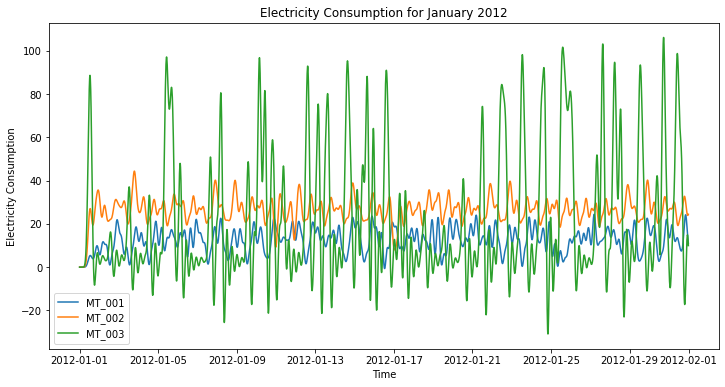

In [ ]:
# Plot the electricity consumption for the first month
plt.figure(figsize=(12, 6))
plt.plot(data['2012-01']['MT_001'], label='MT_001')
plt.plot(data['2012-01']['MT_002'], label='MT_002')
plt.plot(data['2012-01']['MT_003'], label='MT_003')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Electricity Consumption')
plt.title('Electricity Consumption for January 2012')
plt.show()

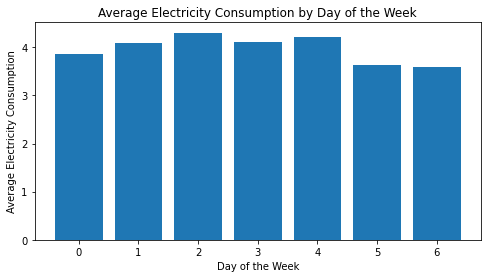

In [ ]:
# Calculate the average electricity consumption for each day of the week
data['weekday'] = data.index.weekday
daily_avg = data.groupby('weekday').mean()

# Plot the daily averages
plt.figure(figsize=(8, 4))
plt.bar(daily_avg.index, daily_avg['MT_001'])
plt.xlabel('Day of the Week')
plt.ylabel('Average Electricity Consumption')
plt.title('Average Electricity Consumption by Day of the Week')
plt.show()

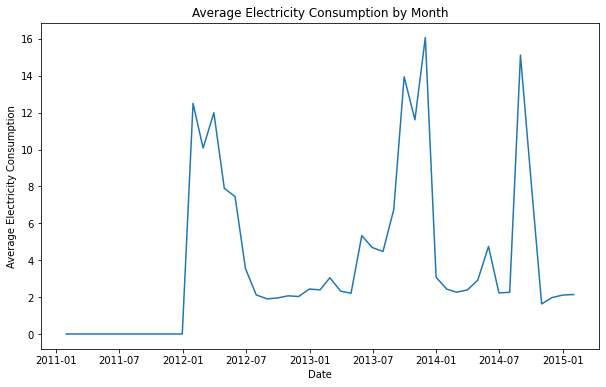

In [ ]:
# Calculate the average electricity consumption for each month
monthly_avg = data.resample("M").mean()

# Plot the monthly averages
plt.figure(figsize=(10, 6))
plt.plot(monthly_avg.index, monthly_avg['MT_001'])
plt.xlabel('Date')
plt.ylabel('Average Electricity Consumption')
plt.title('Average Electricity Consumption by Month')
plt.show()

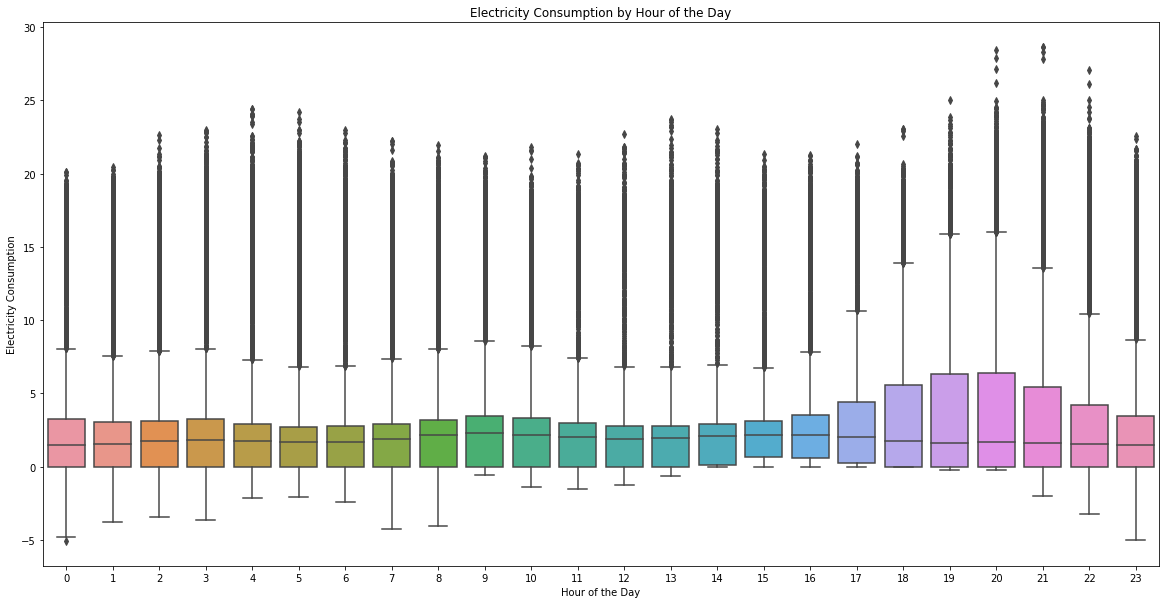

In [ ]:
import seaborn as sns
data['hour'] = data.index.hour
plt.figure(figsize=(20, 10))
# Create a boxplot of electricity consumption by hour of the day
sns.boxplot(x='hour', y='MT_001', data=data)
plt.xlabel('Hour of the Day')
plt.ylabel('Electricity Consumption')
plt.title('Electricity Consumption by Hour of the Day')
plt.show()

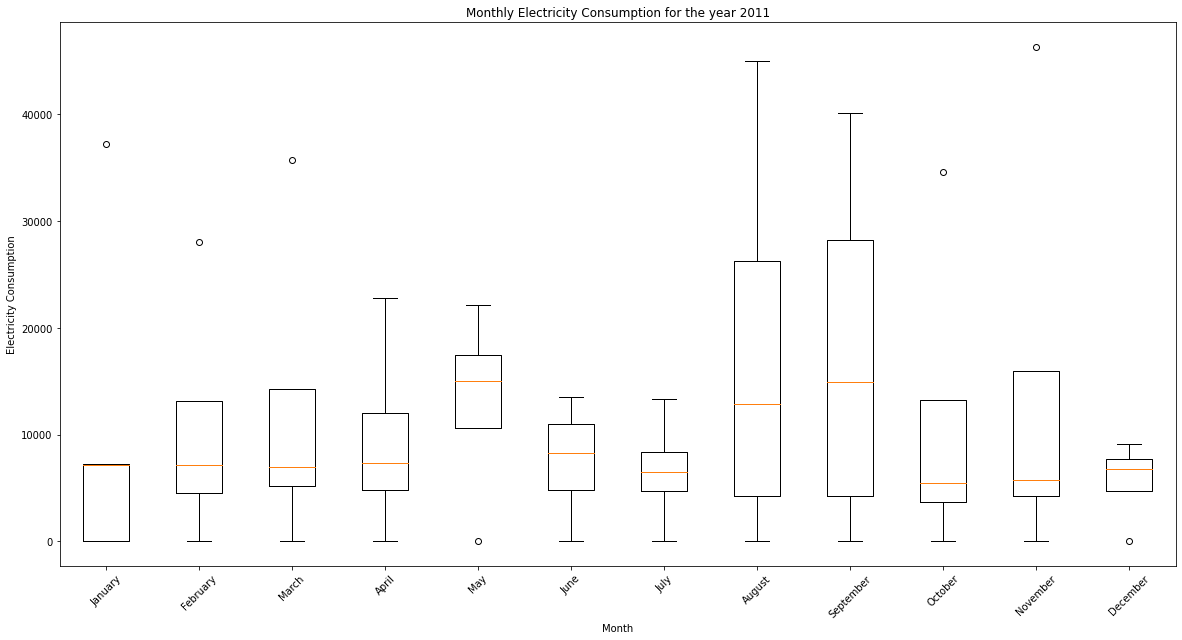

In [ ]:
monthly_data = data.resample('M').sum()

# Extract the year of the data
year = monthly_data.index.year[0]

# Create a box plot of monthly electricity consumption for the year
plt.figure(figsize=(20,10))
plt.boxplot([monthly_data[monthly_data.index.month == i]['MT_001'] for i in range(1, 13)])
plt.xticks(range(1, 13), [pd.to_datetime(str(year)+str(month), format='%Y%m').strftime('%B') for month in range(1, 13)], rotation=45)
plt.xlabel('Month')
plt.ylabel('Electricity Consumption')
plt.title('Monthly Electricity Consumption for the year {}'.format(year))
plt.show()

<ipython-input-32-d5edb5d3bc3f>:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  decomposition = seasonal_decompose(data['2012']['MT_001'], model='additive', period=365)


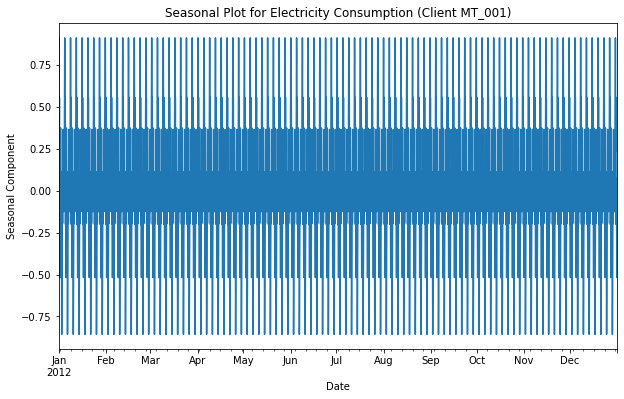

In [ ]:
# Decompose the time series into trend, seasonal, and residual components
decomposition = seasonal_decompose(data['2012']['MT_001'], model='additive', period=365)

# Plot the seasonal component
plt.figure(figsize=(10, 6))
decomposition.seasonal.plot()
plt.xlabel('Date')
plt.ylabel('Seasonal Component')
plt.title('Seasonal Plot for Electricity Consumption (Client MT_001)')
plt.show()

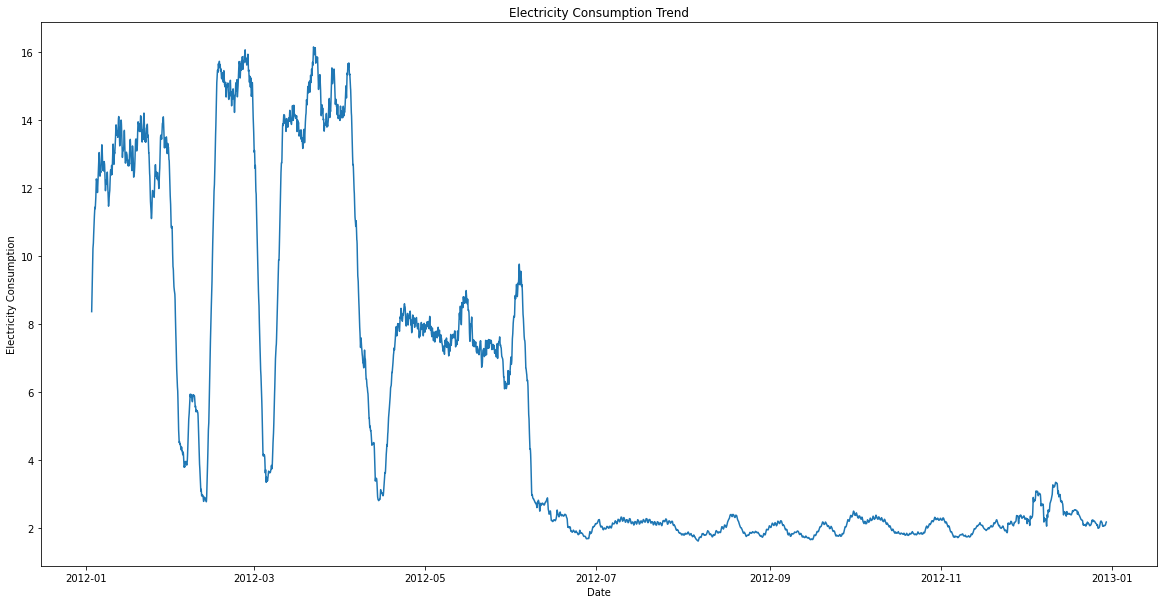

In [ ]:
trend = decomposition.trend
plt.figure(figsize=(20, 10))
# Plot the trend component
plt.plot(trend)
plt.xlabel('Date')
plt.ylabel('Electricity Consumption')
plt.title('Electricity Consumption Trend')
plt.show()


<ipython-input-37-9596b38e92ce>:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  decomposition = seasonal_decompose(data['2014']['MT_001'], model='additive', period=365)


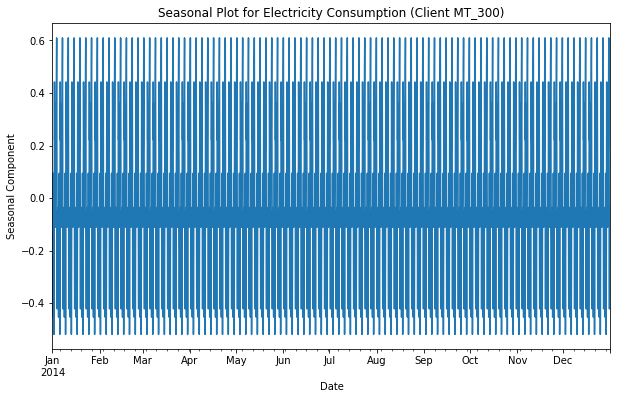

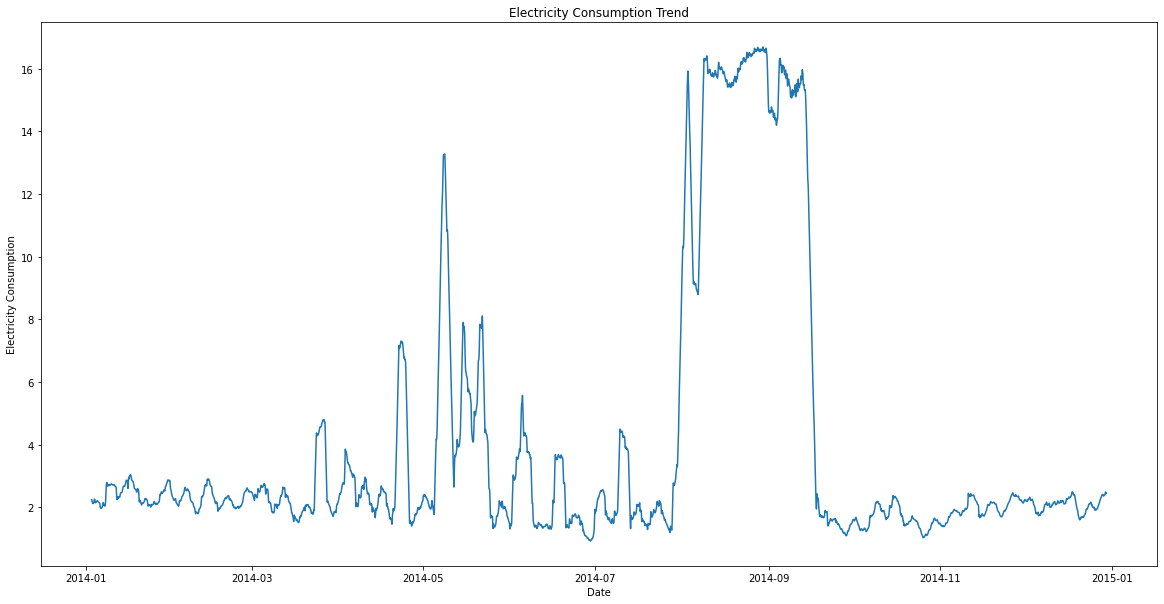

In [ ]:
# Decompose the time series into trend, seasonal, and residual components
decomposition = seasonal_decompose(data['2014']['MT_001'], model='additive', period=365)

# Plot the seasonal component
plt.figure(figsize=(10, 6))
decomposition.seasonal.plot()
plt.xlabel('Date')
plt.ylabel('Seasonal Component')
plt.title('Seasonal Plot for Electricity Consumption (Client MT_300)')
plt.show()

trend = decomposition.trend
plt.figure(figsize=(20, 10))
# Plot the trend component
plt.plot(trend)
plt.xlabel('Date')
plt.ylabel('Electricity Consumption')
plt.title('Electricity Consumption Trend')
plt.show()

<ipython-input-40-ed80c9c94c16>:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  decomposition = seasonal_decompose(data['2013']['MT_300'], model='additive', period=365)


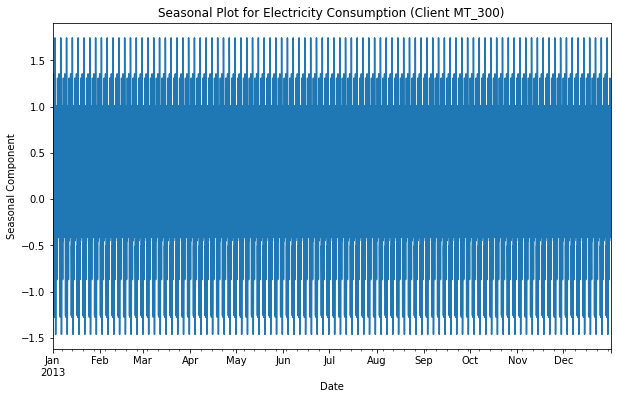

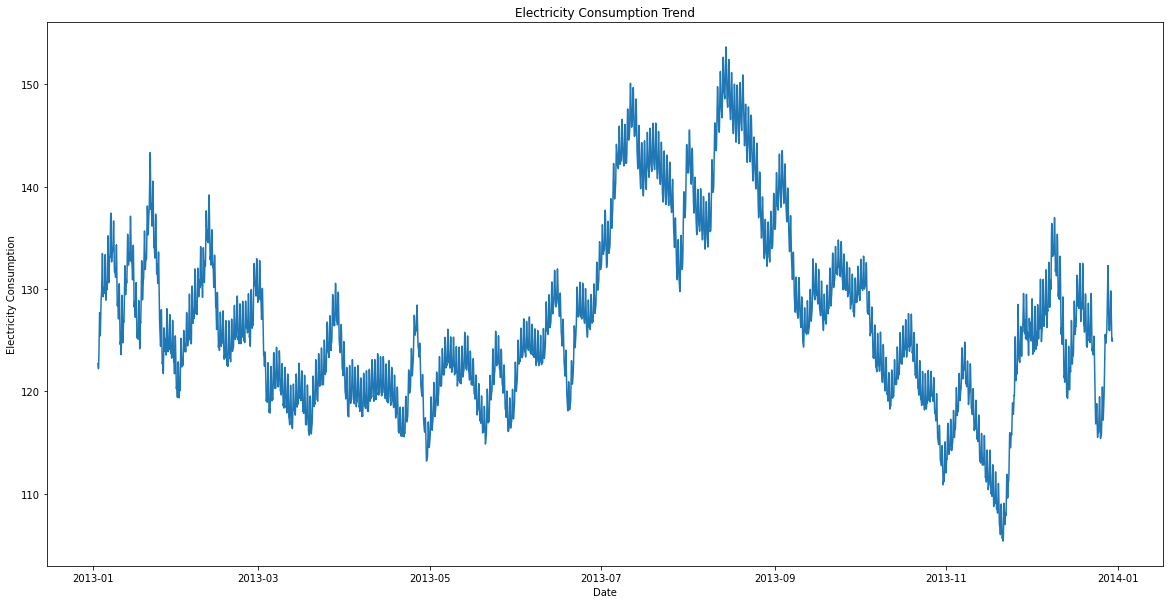

In [ ]:
# Decompose the time series into trend, seasonal, and residual components
decomposition = seasonal_decompose(data['2013']['MT_300'], model='additive', period=365)

# Plot the seasonal component
plt.figure(figsize=(10, 6))
decomposition.seasonal.plot()
plt.xlabel('Date')
plt.ylabel('Seasonal Component')
plt.title('Seasonal Plot for Electricity Consumption (Client MT_300)')
plt.show()

trend = decomposition.trend
plt.figure(figsize=(20, 10))
# Plot the trend component
plt.plot(trend)
plt.xlabel('Date')
plt.ylabel('Electricity Consumption')
plt.title('Electricity Consumption Trend')
plt.show()